In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
# Мода переменной 1
mode_variable1 = df["satisfaction_level"].mode().values[0]

# Мода переменной 2
mode_variable2 = df["last_evaluation"].mode().values[0]

# Мода переменной 3
mode_variable3 = df["number_project"].mode().values[0]

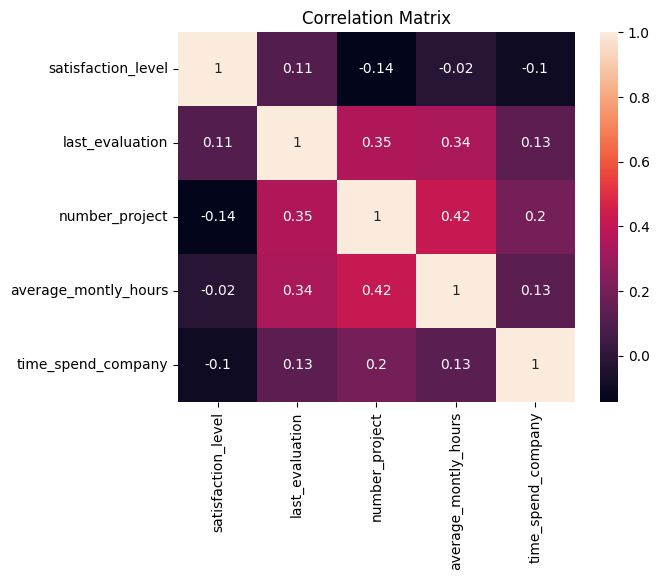

In [ ]:
numeric_variables = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]
correlation_matrix = numeric_variables.corr()

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# 2 самые скоррелированные переменные:average_monthly_hours/number_projects, number_projects/Last_evaluation,
# 2 наименее скоррелированные переменные: number_projects/satisfaction_level, satisfaction_level/time_spend_company
# average_monthly_hours/number_projects - это означает, что сотрудники, которые выполняют больше проектов, обычно проводят больше времени на работе
# number_projects/Last_evaluation - это означает, что сотрудники, выполняющие больше проектов, чаще оцениваются выше.
# number_projects/satisfaction_level - это означает, что количество проектов, над которыми работает сотрудник, не имеет сильного  влияния на его уровень удовлетворенности работой.
# satisfaction_level/time_spend_company - это означает, что стаж работы сотрудника не оказывает сильного влияния на его уровень удовлетворенности работой.

In [ ]:
employees_by_department = df.groupby('department').size()
print(employees_by_department)

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64


In [ ]:
salary_distribution = df['salary'].value_counts()
print(salary_distribution)

low       7316
medium    6446
high      1237
Name: salary, dtype: int64


In [ ]:
salary_distrib_by_depart = df.groupby(['department', 'salary']).size()
print(salary_distrib_by_depart)

department   salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
dtype: int64


In [ ]:
salary_distrib_by_department = df.groupby(['department', 'average_montly_hours']).size()
print(salary_distrib_by_department)

department  average_montly_hours
IT          96                       2
            97                       3
            98                       1
            99                       2
            100                      1
                                    ..
technical   306                      3
            307                      2
            308                      4
            309                     10
            310                      2
Length: 1877, dtype: int64


In [ ]:
from scipy.stats import ttest_ind

high_salary = df[df['salary'] == 'high']['average_montly_hours']
low_salary = df[df['salary'] == 'low']['average_montly_hours']

t_statistic, p_value = ttest_ind(high_salary, low_salary)
print('p-value:', p_value)

p-value: 0.4661023478267259


In [ ]:
# Доля уволившихся сотрудников с повышением
promoted_resigned = len(df[(df["promotion_last_5years"] == 1) & (df["left"] == 1)]) / len(df[df["left"] == 1])

# Доля неуволившихся сотрудников с повышением
promoted_active = len(df[(df["promotion_last_5years"] == 1) & (df["left"] == 0)]) / len(df[df["left"] == 0])
print(promoted_resigned)
print(promoted_active)

0.005320638476617194
0.026251312565628283


In [ ]:
# Средняя степень удовлетворенности уволившихся сотрудников
satisfaction_resigned = df[df["left"] == 1]["satisfaction_level"].mean()

# Средняя степень удовлетворенности неуволившихся сотрудников
satisfaction_active = df[df["left"] == 0]["satisfaction_level"].mean()
print(satisfaction_resigned)
print(satisfaction_active)

0.4400980117614114
0.666809590479524


In [ ]:
# Среднее количество проектов уволившихся сотрудников
projects_resigned = df[df["left"] == 1]["number_project"].mean()

# Среднее количество проектов неуволившихся сотрудников
projects_active = df[df["left"] == 0]["number_project"].mean()
print(projects_resigned)
print(projects_active)

3.8555026603192384
3.786664333216661


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
# Определение независимых переменных
X = df[['average_montly_hours', 'last_evaluation', 'time_spend_company', 'promotion_last_5years', 'number_project', 'satisfaction_level']]

# Определение зависимой переменной
y = df['left']
# Разделение данных на тестовую и обучающую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

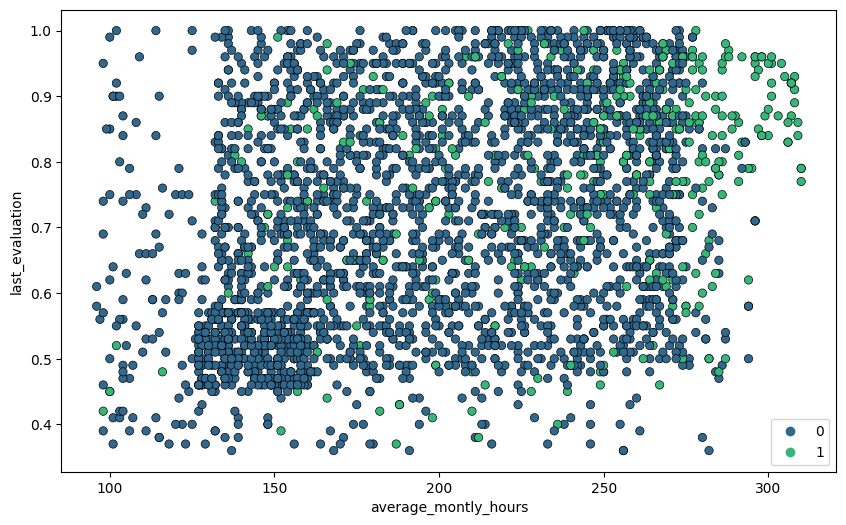

In [ ]:
# Создание модели LDA
lda = LinearDiscriminantAnalysis()

# Обучение модели на обучающей выборке
lda.fit(X_train, y_train)
plt.figure(figsize=(10,6))
# Предсказания на тестовой выборке
y_pred = lda.predict(X_test)
sns.scatterplot(x = X_test['average_montly_hours'], y = X_test['last_evaluation'],
hue = y_pred, palette = 'viridis', edgecolor = 'k', legend = True)
plt.show()


In [ ]:

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7453333333333333
